In [17]:
import numpy as np 
import scipy as sp 
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.notebook_repr_html', True)

from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})  

from cryptocompare import get_daily_trade_hist
from indicators import *

In [2]:
btc = get_daily_trade_hist('XLM', all_data=True)

In [3]:
btc['prev_ath'] = btc.apply(lambda d: btc[:d.name].close.max(), axis=1)

In [4]:
btc['time_since_ath'] = btc.apply(lambda d: (d.name - btc[btc.prev_ath==d.prev_ath].index[0]).days , axis=1)

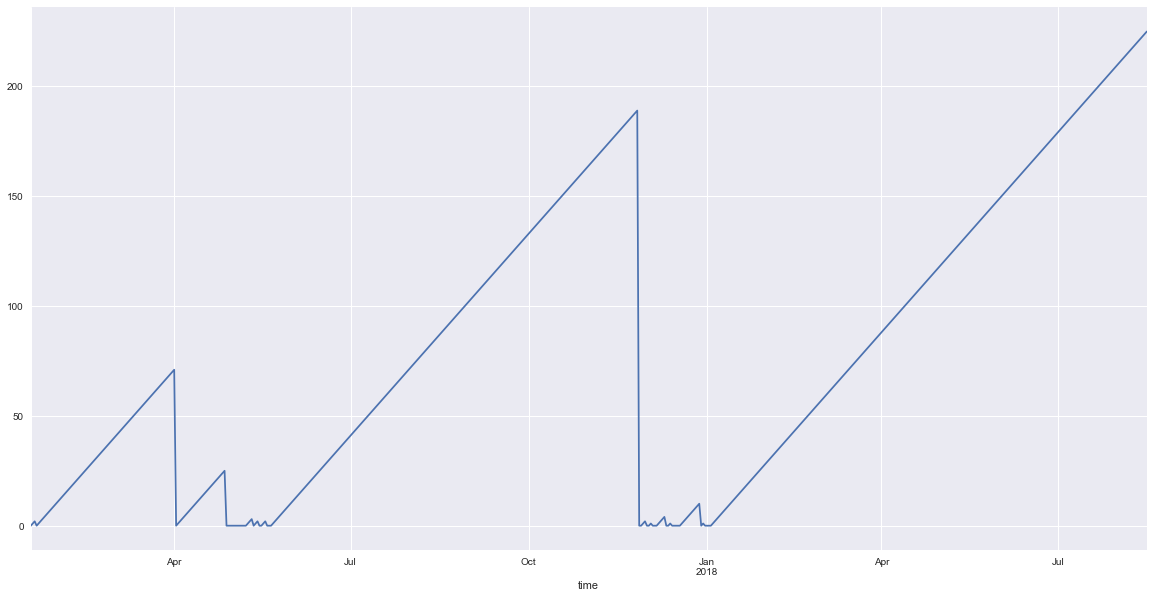

In [18]:
btc.time_since_ath.plot()

In [26]:
def plot_hist(series, start=None, end=None, plot_last=False, kde=False):
    s = series[start:end].dropna()
    sns.distplot(s,kde=kde)
    mean = s.mean()
    feature_label = s.name.replace('_', ' ')
    plt.axvline(mean, label='Mean {} ({})'.format(feature_label, round(mean ,4)), color='black', ls='--')
    
    if plot_last:
        last_val = s[-1]
        plt.axvline(last_val, label="Current {} ({})".format(feature_label, round(last_val,4)), color='yellow')
    
    plt.xlabel(feature_label)
    plt.legend() 
    plt.show()

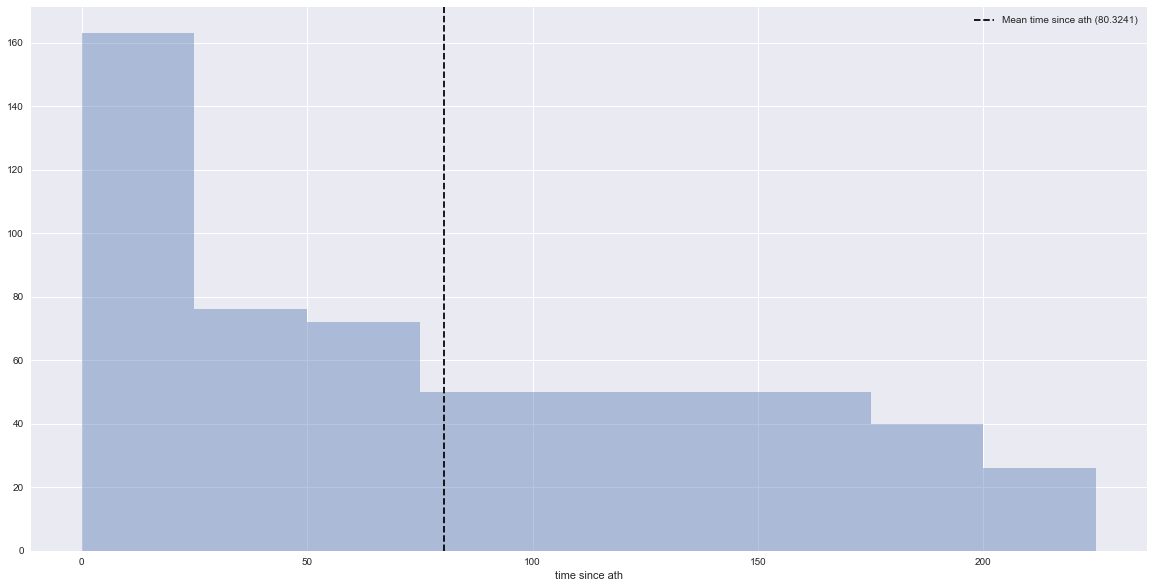

In [30]:
plot_hist(btc.time_since_ath)

In [9]:
btc['direction'] = ((btc.close.pct_change() > 0) * 2) - 1 

In [10]:
btc['rolling_dir'] = btc.direction.rolling(9).sum()

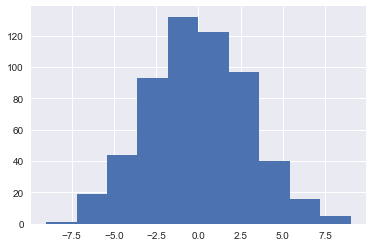

In [11]:
btc.direction.rolling(9).sum().hist()

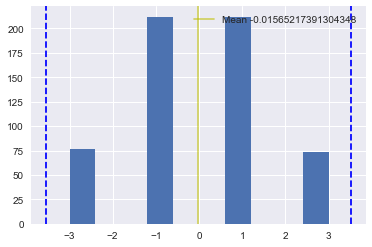

In [12]:
var = btc.direction.rolling(3).sum()
mu = var.mean()
median = var.median()
sigma = var.std() 
var.hist()
plt.axvline(mu, label='Mean {}'.format(mu), color='y', alpha=0.6)
plt.axvline(mu+(2*sigma), color='b', ls='--')
plt.axvline(mu-(2*sigma), color='b', ls='--')
plt.legend()
plt.show()

In [13]:
btc[datetime(2013,10,1):datetime(2015,10,1)][['rolling_dir','close']].plot(subplots=True)

TypeError: Empty 'DataFrame': no numeric data to plot

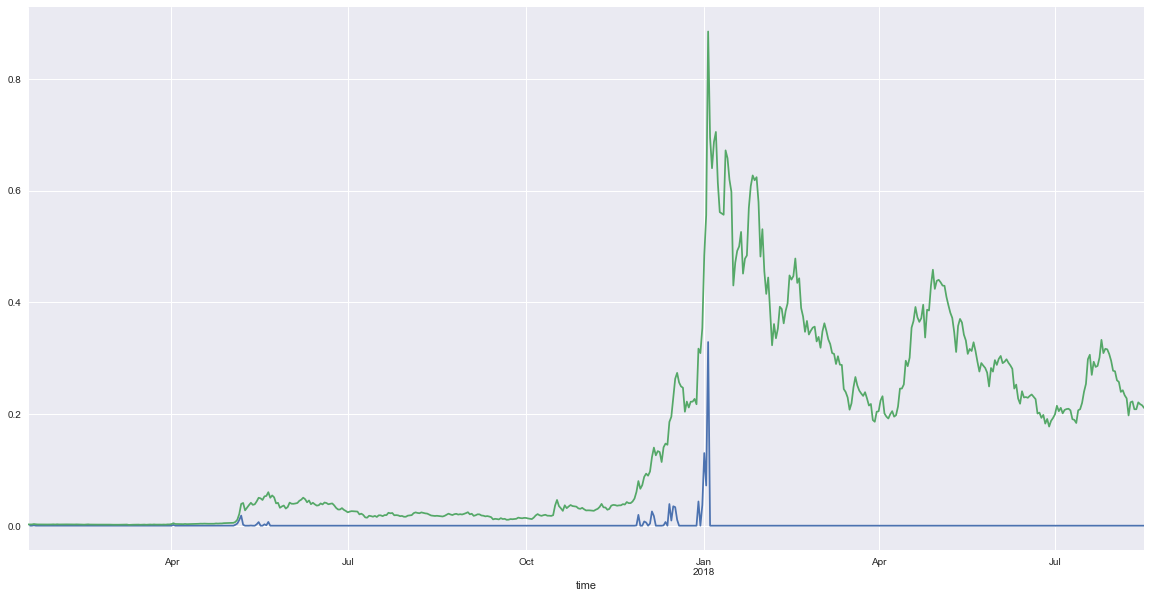

In [19]:
btc.prev_ath.diff().plot()
btc.close.plot()

In [20]:
btc['cycle_bottom'] = btc.apply(lambda d: btc[btc[btc.prev_ath==d.prev_ath].index[0]:d.name].close.min(), axis=1)

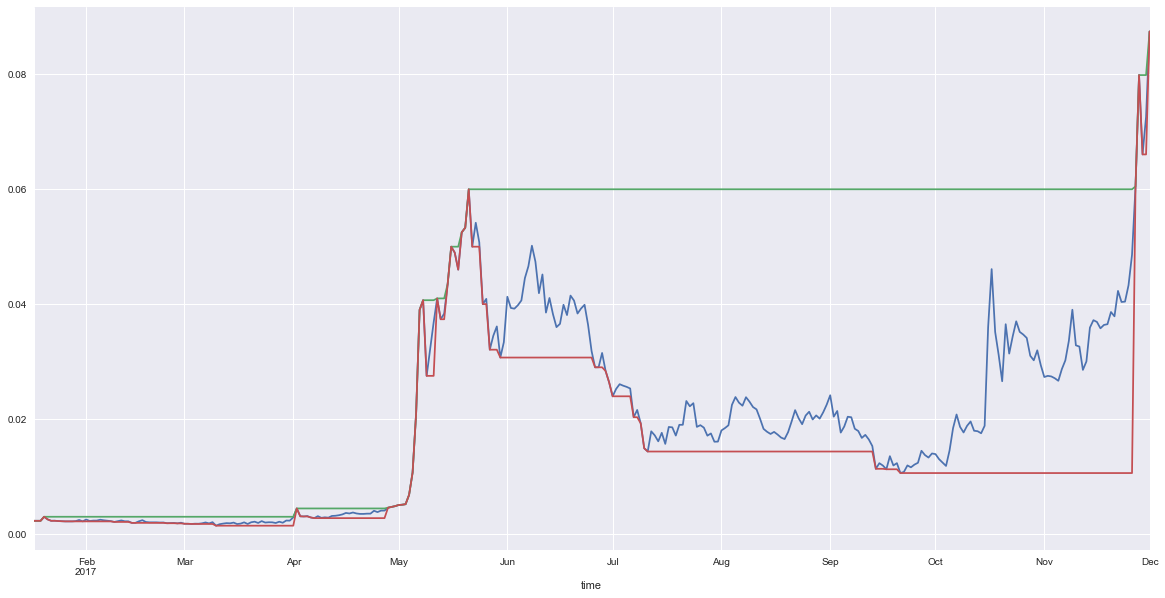

In [25]:
start = None#datetime(2015,1,1)
end = datetime(2017,12,1)
data = btc[start:end]
data.close.plot()
data.prev_ath.plot()
data.cycle_bottom.plot()

In [28]:
btc['time_since_bottom'] = btc.apply(lambda d: (d.name - btc[btc.cycle_bottom==d.cycle_bottom].index[0]).days , axis=1)

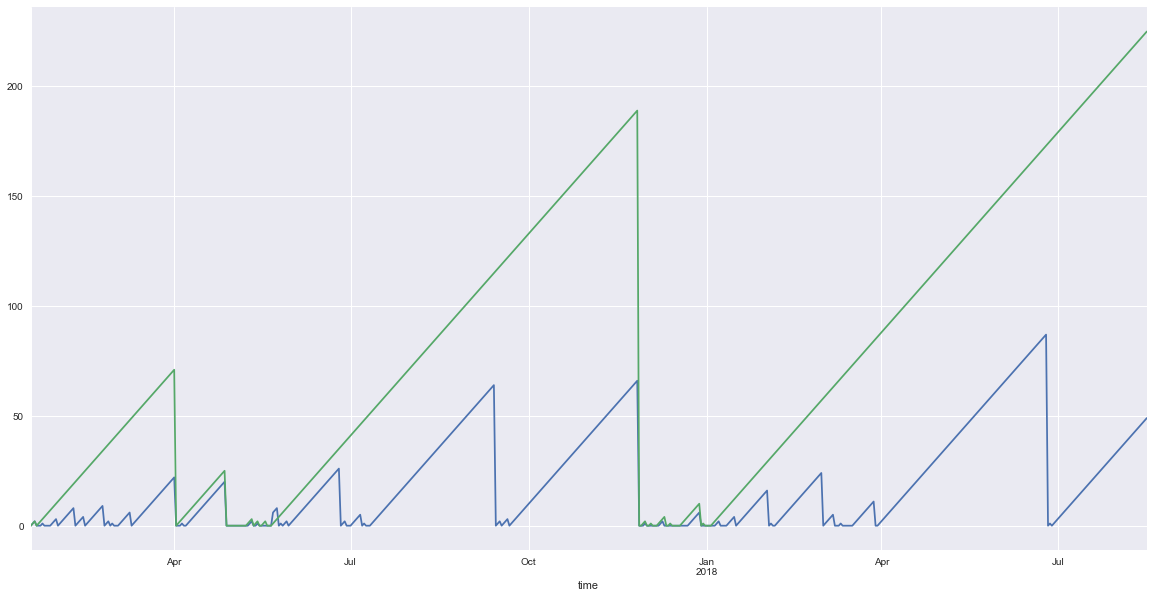

In [29]:
btc.time_since_bottom.plot()
btc.time_since_ath.plot()

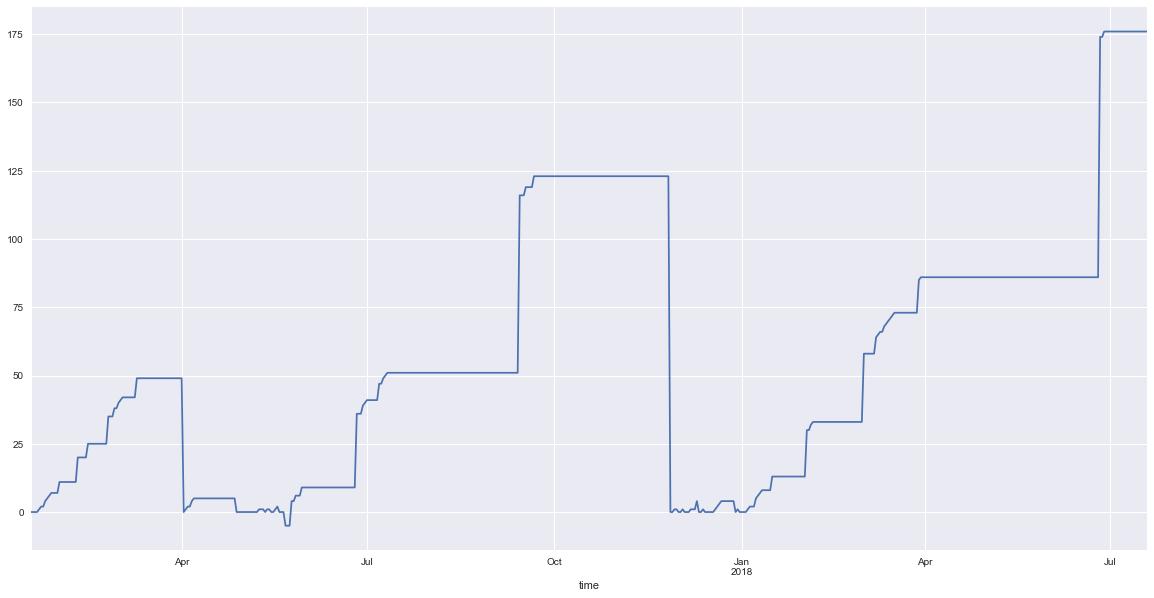

In [75]:

(btc.time_since_ath - btc.time_since_bottom).plot()

On average it take 68 days for bitcoin to find a bottom once a top has been found 

In [76]:
btc.time_since_ath.mean() - btc.time_since_bottom.mean()

55.59016393442623

In [139]:
(0.08080 -.04951)/.04951

0.6319935366592607

In [41]:
btc['dir_buy_signal'] = btc.direction.rolling(9).sum() > 5

In [70]:
btc[(btc.direction.rolling(9).sum() < -5) & (btc.direction.rolling(3).sum()==3)]

,close,high,low,open,volumefrom,volumeto,prev_ath,time_since_ath,direction,rolling_dir,dir_signal,dir_buy_signal
time,,,,,,,,,,,,


In [71]:
btc[(btc.direction.rolling(9).sum() > 5 )& (btc.direction.rolling(3).sum()==-3)]

,close,high,low,open,volumefrom,volumeto,prev_ath,time_since_ath,direction,rolling_dir,dir_signal,dir_buy_signal
time,,,,,,,,,,,,


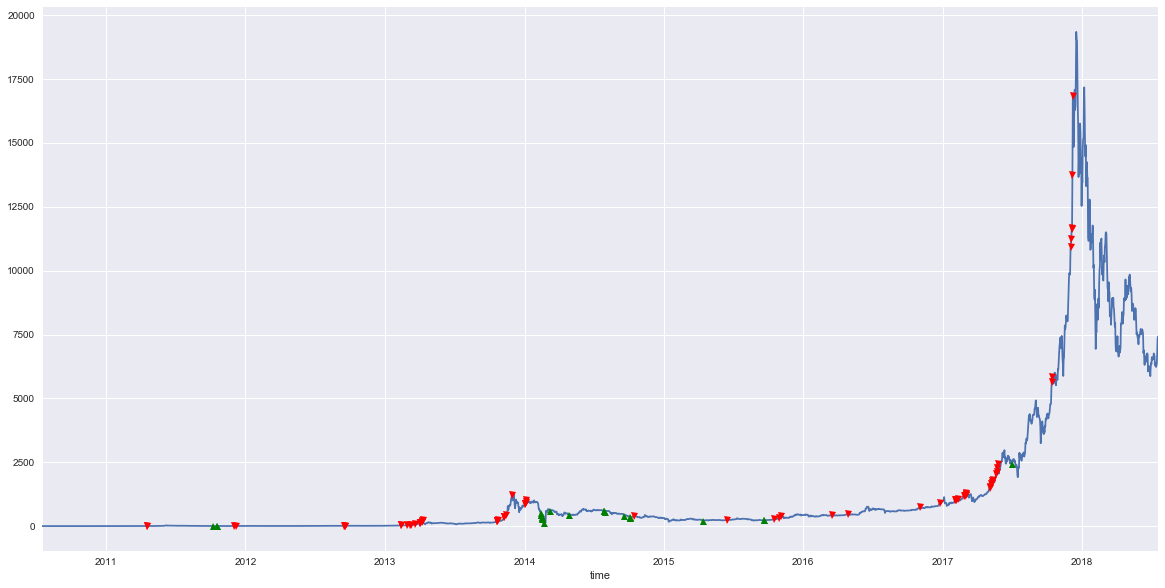

In [73]:
btc.close.plot()
lag = 9
var = btc.direction
threshold
btc[(btc.direction.rolling(9).sum() < -6) & (btc.direction.rolling(3).sum()==-3)].close.plot(marker='^', ls='', color='green')
btc[(btc.direction.rolling(9).sum() > 5 )& (btc.direction.rolling(3).sum()==3)].close.plot(marker='v', ls='', color='red')

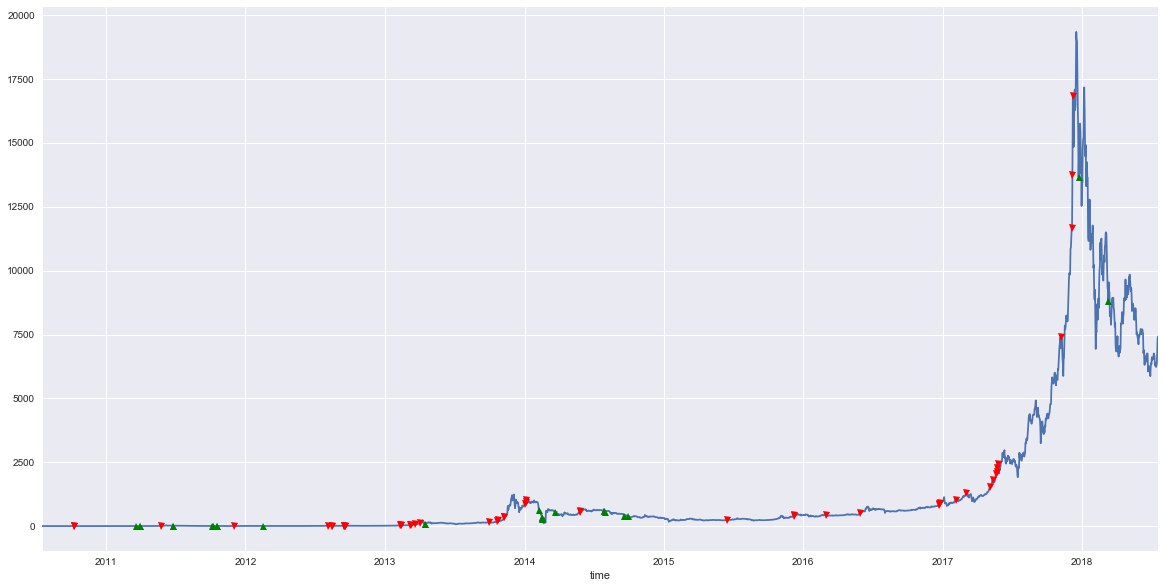

In [77]:
btc.close.plot()
btc[(btc.direction.rolling(6).sum()==-6)].close.plot(marker='^', ls='', color='green')
btc[(btc.direction.rolling(6).sum()==6)].close.plot(marker='v', ls='', color='red')

In [3]:
for time, trades in btc.head().iterrows():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-aee8d3d34b5d>, line 1)

In [ ]:
- what was the previous all time high and how many days has it been since then 